<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/Beat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install librosa

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import moviepy.editor as mpe
import random
import os
import math

In [11]:
ipd.Audio('tt.mov')

In [15]:
plt.figure(figsize=(15,4))
filename = 'tt.mov'
y,sr = librosa.load(filename, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')

<Figure size 1080x288 with 0 Axes>

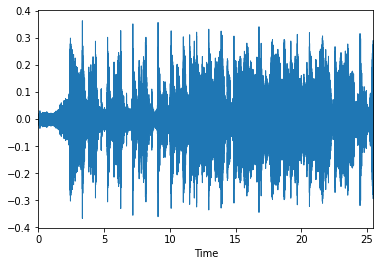

In [16]:
librosa.display.waveplot(data,sr=sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

## Beat Tracking (2 Methods)

In [0]:
# Method 1
tempo, beats = librosa.beat.beat_track(y=y, sr=sr) #tempo is 123, beats are in frames
beats_new = np.delete(beats,[i for i in range(1,beats.shape[0],4)])
beat_times = librosa.frames_to_time(beats_new, sr=sr)
clicks = librosa.clicks(beat_times, sr=sr, length=len(y))

In [29]:
ipd.Audio(y + clicks, rate=sr)
#ipd.Audio(np.vstack([y, clicks]), rate=sr)

--------

In [0]:
# Method 2
onset_env = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)
beat_times = librosa.frames_to_time(beats, sr=sr)
clicks = librosa.clicks(beat_times, sr=sr, length=len(y))

In [27]:
ipd.Audio(y + clicks, rate=sr)

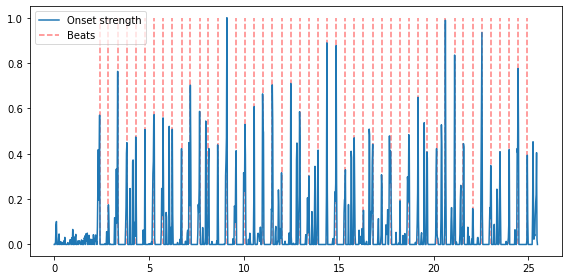

In [22]:
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
#plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

## DIY Beat Visualizer

In [26]:
librosa.get_duration(y)

25.480453514739228

In [0]:
fps = 30
seconds = int(librosa.get_duration(y))
b= beat_times*fps
out = cv2.VideoWriter('test.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (340,230))
j=0
for i in range(fps*seconds):
  frame = np.zeros((230,340,3), np.uint8)
  if j < (b.shape[0]) and i == int(round(b[j])) :
    frame = cv2.circle(frame, (170,115), 40, (255,255,255), thickness = -1)
    j+=1
  out.write(frame)
out.release()

In [33]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('test.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=340 height=230 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [34]:
ipd.Audio(y, rate=sr)